<a href="https://colab.research.google.com/github/sangbum-parkpark/ai02-project/blob/main/AI_02_%EB%B0%95%EC%83%81%EB%B2%94_Section2%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# %%capture
# import sys

# if 'google.colab' in sys.modules:
#     # Install packages in Colab
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pandas-profiling==2.* 
#     !pip install pdpbox
#     !pip install shap

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

#**1) 데이터 선정 이유, 및 문제 정의**
**데이터를 선정할 때에는 반드시 왜 해당 데이터를 선택했는지에 대해 박상범님의 이유를 자세히 설명해주셔야 합니다. 데이터셋 선정이 끝났다면 어떤 유형의 문제로 (분류 / 회귀) 접근할지도 결정합니다.**

**이전에 부모님께서 간관련 질환을 갖고 계셨던 때가 있으셨고, 또 최근 간이 어떤 역할을 하는지, 중요성에 대해 알게되었습니다.**

\
**그래서 평소 쉽게 얻을 수 있는 데이터들을 이용해서 간 건강에 문제가 있을 '수' 있는 지 알아내고, 그 결과를 참고해 병원에 방문해 간 검사를 진행한다면 관련 질환들이 악화되는 것을 예방할 수 있을 것이라 생각했습니다.**

\
**관련 데이터를 찾다가 공공데이터포털에서 국민건강보험공단 가입자 대상 건강검진정보 데이터를 수집할 수 있었습니다.***



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/gdrive/MyDrive/AI부트캠프/국민건강보험공단_건강검진정보_20191231.csv', encoding= 'euc_kr')
df.shape

(1000000, 34)

In [ ]:
# 총 10만개 데이터 중 n개를 이용한 데이터 분석을 진행할 것이다.(용량 문제)
df = df.sample(n=50000, random_state=1)
df = df.reset_index()
df = df.drop('index', axis = 1)
print(df.shape)
df.head()

(50000, 34)


,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,276827,11,1,11,160,65,86.0,1.2,1.5,1.0,1.0,140.0,90.0,102.0,NaN,NaN,NaN,NaN,15.1,1.0,0.8,38.0,17.0,19.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
1,2019,849426,26,2,13,155,50,74.6,0.7,1.2,1.0,1.0,146.0,74.0,102.0,187.0,128.0,56.0,105.0,13.6,1.0,0.9,31.0,39.0,43.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
2,2019,504500,11,2,7,160,45,63.2,1.5,1.5,1.0,1.0,103.0,63.0,96.0,NaN,NaN,NaN,NaN,12.6,1.0,0.6,17.0,8.0,12.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,601055,46,1,8,170,85,89.0,1.2,1.2,1.0,1.0,110.0,70.0,96.0,NaN,NaN,NaN,NaN,15.8,1.0,1.0,26.0,38.0,33.0,1.0,NaN,1,1.0,미시행,미시행,미시행,1.0,20191231
4,2019,980222,41,1,9,185,75,86.5,1.0,0.5,1.0,1.0,118.0,86.0,93.0,150.0,59.0,60.0,78.0,16.5,1.0,0.8,46.0,64.0,44.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231


In [ ]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [ ]:
# ALT 간손상의 표지자, 
# 상한치는 남성 33, 여성 25
# AST
# 상한치는 40
# 일상에서 비만을 예측하는 것은 쉽지만,
# 간손상을 알아차리기 어렵기 때문이다.

# 건강검진 시 간단한 정보(성별, 나이, 신장, 체중, 허리둘레, 흡연상태, 음주여부)로 
# 간검사를 추가해야하는지 여부를 결정하는 것이 목적
# + 혈압 또한 일상에서 상대적으로 쉽게 측정할 수 있으므로 포함.

# train 데이터는 기존데이터(df)의 ALT, AST 지표를 통해 간손상 여부를 알아내고 
# 그를 통해 새로운 feature '간손상의심'를 추가한다.
# 그리고 'ALT', 'AST' feature는 제거한다.

# '신장', '체중', '허리둘레' 특성을
# '신장대비체중', '신장대비허리둘레' 특성으로 변환한다.

#**EDA 및 데이터 전처리**

**Feature 간의 상관관계를 알아보고 그에 따른 특성 선택 과정을 진행하지 않았습니다.**

**그 이유는 제가 설정한 시나리오의 결과물은**

**'평소 쉽게 얻을 수 있는 데이터들을 이용해서 간 건강에 문제가 있을 '수' 있는 지를 알아내는 것' 이기 때문입니다.**

**따라서 이 조건에 따라 특성들을 결정했고**

**선정한 특성들을 기준으로 만든 모델의 성능을 검증해보고 모델의 성능이 유의미한 결과를 보이는가를 확인할 것 입니다.**

In [ ]:
drops = ['기준년도', '가입자 일련번호', '시도코드',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '감마 지티피',
       '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자']

df = df.drop(drops, axis = 1)
df.shape

(50000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별코드          50000 non-null  int64  
 1   연령대 코드(5세단위)  50000 non-null  int64  
 2   신장(5Cm단위)     50000 non-null  int64  
 3   체중(5Kg 단위)    50000 non-null  int64  
 4   허리둘레          49984 non-null  float64
 5   수축기 혈압        49712 non-null  float64
 6   이완기 혈압        49712 non-null  float64
 7   (혈청지오티)ALT    49708 non-null  float64
 8   흡연상태          49996 non-null  float64
 9   음주여부          32422 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.8 MB


In [ ]:
df.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,(혈청지오티)ALT,흡연상태,음주여부
0,1,11,160,65,86.0,140.0,90.0,17.0,1.0,1.0
1,2,13,155,50,74.6,146.0,74.0,39.0,1.0,1.0
2,2,7,160,45,63.2,103.0,63.0,8.0,1.0,1.0
3,1,8,170,85,89.0,110.0,70.0,38.0,1.0,NaN
4,1,9,185,75,86.5,118.0,86.0,64.0,1.0,1.0


In [ ]:
print(df['성별코드'].unique())

# '성별코드' 특성에는 결측치가 없고, 1(남자), 2(여자) 데이터만 존재합니다.
# 따라서 바로 남자 데이터와 여자 데이터를 분리했습니다.

male = df[df['성별코드'] == 1]
female = df[df['성별코드'] == 2]
male.shape, female.shape, df.shape

[1 2]


((25897, 10), (24103, 10), (50000, 10))

In [ ]:
# '허리둘레' 특성의 결측치 확인 및 대치
print('남자 허리둘레 결측치 수',male['허리둘레'].isnull().sum())
print('여자 허리둘레 결측치 수', female['허리둘레'].isnull().sum())

female.loc[:, "허리둘레"] = female.loc[:, "허리둘레"].fillna(female['허리둘레'].mean())
print('여자 허리둘레 결측치 수', female['허리둘레'].isnull().sum())

# '수축기 혈압' 특성의 결측치 확인 및 대치
print('남자 수축기 혈압 결측치 수',male['수축기 혈압'].isnull().sum())
print('여자 수축기 혈압 결측치 수', female['수축기 혈압'].isnull().sum())

male.loc[:, "수축기 혈압"] = male.loc[:, "수축기 혈압"].fillna(male['수축기 혈압'].mean())
female.loc[:, "수축기 혈압"] = female.loc[:, "수축기 혈압"].fillna(female['수축기 혈압'].mean())
print('남자 수축기 혈압 결측치 수', male['수축기 혈압'].isnull().sum())
print('여자 수축기 혈압 결측치 수', female['수축기 혈압'].isnull().sum())

# '이완기 혈압' 특성의 결측치 확인 및 대치
print('남자 이완기 혈압 결측치 수',male['이완기 혈압'].isnull().sum())
print('여자 이완기 혈압 결측치 수', female['이완기 혈압'].isnull().sum())

male.loc[:, "이완기 혈압"] = male.loc[:, "이완기 혈압"].fillna(male['이완기 혈압'].mean())
female.loc[:, "이완기 혈압"] = female.loc[:, "이완기 혈압"].fillna(female['이완기 혈압'].mean())
print('남자 이완기 혈압 결측치 수', male['이완기 혈압'].isnull().sum())
print('여자 이완기 혈압 결측치 수', female['이완기 혈압'].isnull().sum())

# '(혈청지오티)ALT' 특성의 결측치 확인 및 대치
print('남자 (혈청지오티)ALT 결측치 수',male['(혈청지오티)ALT'].isnull().sum())
print('여자 (혈청지오티)ALT 결측치 수', female['(혈청지오티)ALT'].isnull().sum())

male.loc[:, "(혈청지오티)ALT"] = male.loc[:, "(혈청지오티)ALT"].fillna(male['(혈청지오티)ALT'].mean())
female.loc[:, "(혈청지오티)ALT"] = female.loc[:, "(혈청지오티)ALT"].fillna(female['(혈청지오티)ALT'].mean())
print('남자 (혈청지오티)ALT 결측치 수', male['(혈청지오티)ALT'].isnull().sum())
print('여자 (혈청지오티)ALT 결측치 수', female['(혈청지오티)ALT'].isnull().sum())

# '흡연상태' 특성의 결측치 확인 및 대치
print('남자 흡연상태 결측치 수',male['흡연상태'].isnull().sum())
print('여자 흡연상태 결측치 수', female['흡연상태'].isnull().sum())

male.loc[:, "흡연상태"] = male.loc[:, "흡연상태"].fillna(1)
female.loc[:, "흡연상태"] = female.loc[:, "흡연상태"].fillna(1)
print('남자 흡연상태 결측치 수', male['흡연상태'].isnull().sum())
print('여자 흡연상태 결측치 수', female['흡연상태'].isnull().sum())

# '흡연상태' 특성 1(피우지 않는다) 2(피운다)를
#                 0                1        로 대치
male['흡연상태'] = male['흡연상태'].replace({1: 0, 2: 1})
female['흡연상태'] = female['흡연상태'].replace({1: 0, 2: 1})

남자 허리둘레 결측치 수 0
여자 허리둘레 결측치 수 16
여자 허리둘레 결측치 수 0
남자 수축기 혈압 결측치 수 89
여자 수축기 혈압 결측치 수 199
남자 수축기 혈압 결측치 수 0
여자 수축기 혈압 결측치 수 0
남자 이완기 혈압 결측치 수 89
여자 이완기 혈압 결측치 수 199
남자 이완기 혈압 결측치 수 0
여자 이완기 혈압 결측치 수 0
남자 (혈청지오티)ALT 결측치 수 92
여자 (혈청지오티)ALT 결측치 수 200
남자 (혈청지오티)ALT 결측치 수 0
여자 (혈청지오티)ALT 결측치 수 0
남자 흡연상태 결측치 수 2
여자 흡연상태 결측치 수 2
남자 흡연상태 결측치 수 0
여자 흡연상태 결측치 수 0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
# ALT 간손상의 표지자로써 ALT 데이터를 이용해 target 특성으로 활용할 '간손상의심' 특성을 만들었습니다. 
# 상한치는 남성 33, 여성 25

# True  = 손상의심O
# False = 손상의심X
print(male.shape, female.shape)

male['간손상의심'] = male['(혈청지오티)ALT'] > 33
female['간손상의심'] = female['(혈청지오티)ALT'] > 25
print(male.shape, female.shape)

# 남자, 여자로 나눴던 데이터를 하나의 데이터로 다시 합쳤습니다.
data = pd.merge(male, female, how='outer')
print(data.shape)

# False 데이터 = 0
# True 데이터  = 1 으로 치환
data['간손상의심'] = data['간손상의심'].replace({False: 0, True: 1})
data['간손상의심']

(25897, 10) (24103, 10)
(25897, 11) (24103, 11)
(50000, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        0
1        1
2        1
3        1
4        0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: 간손상의심, Length: 50000, dtype: int64

In [ ]:
# 음주여부 특성이 1과 NaN 데이터로 구성되어 있는 것을 확인
# 음주여부 특성은 0(마시지 않는다), 1(마신다)
print(data['음주여부'].unique())

# NaN(결측치) 데이터를 0으로 치환 NaN(결측치) 데이터를 0으로 치환
data.loc[:, "음주여부"] = data.loc[:, "음주여부"].fillna(0)
print(data['음주여부'].unique())
print(data['음주여부'].isnull().sum())

[ 1. nan]
[1. 0.]
0


In [ ]:
# class가 2개인 분류 문제이다.
# target 특성의 class 비율이 76.63%, 23.37%로 불균형하다.

################ 조정이 필요하다.###########
data['간손상의심'].value_counts(normalize = True)

0    0.7642
1    0.2358
Name: 간손상의심, dtype: float64

In [ ]:
print(data.shape)
# Data Leakage를 방지하기 위해서 target 특성의 기준이 되었던 '(혈청지오티)ALT' 특성을 제거
data = data.drop('(혈청지오티)ALT', axis = 1)
print(data.shape)

(50000, 11)
(50000, 10)


In [ ]:
data.head()

,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,흡연상태,음주여부,간손상의심
0,1,11,160,65,86.0,140.0,90.0,0.0,1.0,0
1,1,8,170,85,89.0,110.0,70.0,0.0,0.0,1
2,1,9,185,75,86.5,118.0,86.0,0.0,1.0,1
3,1,15,170,60,80.0,124.0,80.0,0.0,1.0,1
4,1,6,185,70,75.6,127.0,72.0,0.0,1.0,0


In [ ]:
data['연령대 코드(5세단위)'].unique()

array([11,  8,  9, 15,  6,  7, 10, 12, 17, 13, 14, 16,  5, 18])

In [ ]:
# 체중, 허리둘레 데이터를, 체중/신장, 허리둘레/신장 데이터로 변환했습니다.
data['체중_신장'] = data['체중(5Kg 단위)'] / data['신장(5Cm단위)']
data['허리둘레_신장'] = data['허리둘레'] / data['신장(5Cm단위)']
data = data.drop(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레'], axis = 1)

# 5로 나뉘어 구분되어있던 연령대 데이터를 변환했습니다.
data['연령대'] = data['연령대 코드(5세단위)'] * 5
data = data.drop('연령대 코드(5세단위)', axis = 1) 
data.head()

data.head()

,성별코드,수축기 혈압,이완기 혈압,흡연상태,음주여부,간손상의심,체중_신장,허리둘레_신장,연령대
0,1,140.0,90.0,0.0,1.0,0,0.406250,0.537500,55
1,1,110.0,70.0,0.0,0.0,1,0.500000,0.523529,40
2,1,118.0,86.0,0.0,1.0,1,0.405405,0.467568,45
3,1,124.0,80.0,0.0,1.0,1,0.352941,0.470588,75
4,1,127.0,72.0,0.0,1.0,0,0.378378,0.408649,30


In [ ]:
data = data[['성별코드', '연령대', '체중_신장', '허리둘레_신장',
             '흡연상태', '음주여부', '수축기 혈압', '이완기 혈압',
             '간손상의심']]
data.head()

,성별코드,연령대,체중_신장,허리둘레_신장,흡연상태,음주여부,수축기 혈압,이완기 혈압,간손상의심
0,1,55,0.406250,0.537500,0.0,1.0,140.0,90.0,0
1,1,40,0.500000,0.523529,0.0,0.0,110.0,70.0,1
2,1,45,0.405405,0.467568,0.0,1.0,118.0,86.0,1
3,1,75,0.352941,0.470588,0.0,1.0,124.0,80.0,1
4,1,30,0.378378,0.408649,0.0,1.0,127.0,72.0,0


In [ ]:
# 남자와 여자 데이터가 분리되어있으므로 .sample 을 통해 data를 섞어준다.
data = data.sample(frac = 1).reset_index(drop=True)
data.head()

,성별코드,연령대,체중_신장,허리둘레_신장,흡연상태,음주여부,수축기 혈압,이완기 혈압,간손상의심
0,2,35,0.354839,0.459355,0.0,1.0,96.0,60.0,0
1,1,60,0.400000,0.580000,1.0,1.0,136.0,84.0,0
2,1,35,0.542857,0.582857,0.0,1.0,144.0,92.0,0
3,1,60,0.352941,0.502941,1.0,1.0,136.0,88.0,1
4,2,50,0.290323,0.412903,0.0,1.0,100.0,64.0,0


#**Target 데이터 분류 비율 확인**

**Target class가 두 개인 분류 문제입니다.**

**하지만 class들이 각각 76%, 23%로 불균형한 모습을 보입니다.**

**따라서 학습 데이터 셋의 class들은 좀 더 균형있게 만들고, accuracy가 아닌, precision, recall, f1-score를 이용해 평가할 것입니다.**




#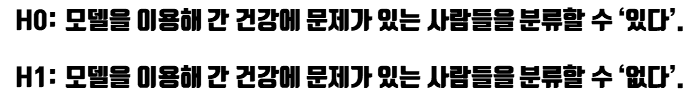

In [ ]:
target = '간손상의심'
data[target].value_counts(normalize = True)

0    0.7642
1    0.2358
Name: 간손상의심, dtype: float64

In [ ]:
# 훈련/검증/테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=2)
train, val = train_test_split(train, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)
print("test shape: ", test.shape)

train shape:  (28125, 9)
val shape:  (9375, 9)
test shape:  (12500, 9)


In [ ]:
target = '간손상의심'
X_train = train.drop(target, axis = 1)
y_train = train[target]
X_val = val.drop(target, axis = 1)
y_val = val[target]
X_test = test.drop(target, axis = 1)
y_test = test[target]

#**model1 - RandomForest(default)를 이용한 기준모델**

**검증 데이터 f1-score: 0.28**

In [ ]:
# Ensemble Bagging
# Randomforest classifier

from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

pipe = make_pipeline(
    OneHotEncoder(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)

print(classification_report(y_val, pipe.predict(X_val)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도 0.7752533333333333
기준 모델:  0.7642
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7217
           1       0.53      0.19      0.28      2158

    accuracy                           0.78      9375
   macro avg       0.67      0.57      0.57      9375
weighted avg       0.74      0.78      0.73      9375



#**model2 - XGBoost를 이용한 분류모델**

**검증 데이터 f1-score: 0.28**

In [ ]:
# Ensemble Boosting
# XGBClassifier
pipe_XGB = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , min_child_weight =1
                  , random_state=2
                  , n_jobs=-1           # 병렬처리
                  , max_depth=8
                  , learning_rate=0.2
                 )
)

pipe_XGB.fit(X_train, y_train);

print(classification_report(y_val, pipe_XGB.predict(X_val)))

0.7707733333333333
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      7217
           1       0.51      0.19      0.28      2158

    accuracy                           0.77      9375
   macro avg       0.65      0.57      0.57      9375
weighted avg       0.73      0.77      0.73      9375



#**훈련 데이터 target 비율 조정, target 값이 0인 데이터 중 20000개 데이터만을 이용** 

In [ ]:
data[target].value_counts()

0    38210
1    11790
Name: 간손상의심, dtype: int64

In [ ]:
# target = 0, 1 데이터 분류
data_0 = data[data['간손상의심'] == 0]
data_1 = data[data['간손상의심'] == 1]

# target = 0 데이터 섞은 후, 20000개 추출
data_0= data_0.sample(frac = 1).reset_index(drop=True)
data_0 = data_0.iloc[:20000]
# data_0_1 = data_0.iloc[20001:]

# 0
data_ratio = pd.merge(data_0, data_1, how = 'outer')

# 샘플데이터 섞기
data_ratio = data_ratio.sample(frac = 1).reset_index(drop=True)
print("data_0 shape: ", data_0.shape)
print("data_1 shape: ", data_1.shape)
print("data_ratio shape: ", data_ratio.shape)
print("data_ratio class ratio: ", data_ratio['간손상의심'].value_counts(normalize = True))

data_0 shape:  (20000, 9)
data_1 shape:  (11790, 9)
data_ratio shape:  (31790, 9)
data_ratio class ratio:  0    0.629129
1    0.370871
Name: 간손상의심, dtype: float64


In [ ]:
# 훈련/검증/테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
train_ratio, test_ratio = train_test_split(data_ratio, random_state=2)
train_ratio, val_ratio = train_test_split(train_ratio, random_state=2)
print("train_ratio shape: ", train_ratio.shape)
print("val_ratio shape: ", val_ratio.shape)
print("test_ratio shape: ", test_ratio.shape)

target = '간손상의심'
X_train_ratio = train_ratio.drop(target, axis = 1)
y_train_ratio = train_ratio[target]
X_val_ratio = val_ratio.drop(target, axis = 1)
y_val_ratio = val_ratio[target]
X_test_ratio = test_ratio.drop(target, axis = 1)
y_test_ratio = test_ratio[target]

train_ratio shape:  (17881, 9)
val_ratio shape:  (5961, 9)
test_ratio shape:  (7948, 9)


#**model3 - Randomforest, 훈련데이터 비율조정**

**검증 데이터 f1-score: 0.49**

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

pipe_ratio = make_pipeline(
    OneHotEncoder(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_ratio.fit(X_train_ratio, y_train_ratio)


print(classification_report(y_val_ratio, pipe_ratio.predict(X_val_ratio)))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도_ratio:  0.6715316222110385
기준 모델_ratio:  0.6291286568103177
검증 정확도:  0.7752533333333333
기준 모델:  0.7642
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      3731
           1       0.59      0.42      0.49      2230

    accuracy                           0.67      5961
   macro avg       0.64      0.62      0.62      5961
weighted avg       0.66      0.67      0.66      5961



#**model4 - XGBoost, 훈련데이터 비율조정**

**검증 데이터 f1-score: 0.53**

In [ ]:
# Ensemble Boosting
# XGBClassifier
pipe_XGB_ratio = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=200
                  , min_child_weight =1
                  , random_state=2
                  , n_jobs=-1           # 병렬처리
                  , max_depth=8
                  , learning_rate=0.2
                 )
)

pipe_XGB_ratio.fit(X_train, y_train);

print(classification_report(y_val_ratio, pipe_XGB_ratio.predict(X_val_ratio)))

검증 정확도_ratio 0.7461835262539842
기준 모델_ratio:  0.6291286568103177
검증 정확도 0.7707733333333333
기준 모델:  0.7642
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      3731
           1       0.87      0.38      0.53      2230

    accuracy                           0.75      5961
   macro avg       0.80      0.67      0.68      5961
weighted avg       0.78      0.75      0.71      5961



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['randomforestclassifier'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
# X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

흡연상태      -0.000896
음주여부       0.002347
성별코드       0.002901
수축기 혈압     0.003669
이완기 혈압     0.003797
연령대        0.007957
허리둘레_신장    0.011541
체중_신장      0.013163
dtype: float64

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0132 ± 0.0026,체중_신장
0.0115 ± 0.0028,허리둘레_신장
0.0080 ± 0.0021,연령대
0.0038 ± 0.0042,이완기 혈압
0.0037 ± 0.0023,수축기 혈압
0.0029 ± 0.0021,성별코드
0.0023 ± 0.0008,음주여부
-0.0009 ± 0.0026,흡연상태


#**model 설정 파라미터에 타겟 분류 비중 추가**

In [ ]:
# 타겟 분류 비율
train_vc = y_train.value_counts().tolist()

weight = float(train_vc[0] / train_vc[1])
weight

3.2562046004842613

#**RandomForest보다 XGBoost 분류모델의 성능이 더 높아, 이후 XGBoost로만 학습을 진행**

#**model5 - XGBoost, 훈련데이터 비율조정X, 타겟 분류 비중 파라미터 추가 O**

**검증 데이터 f1-score: 0.46**

In [ ]:
#
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(
    n_estimators=2000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    min_child_weight=1,
    random_state=2,
    n_jobs=-1,
    max_depth=8,        # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
    learning_rate=0.2,
    scale_pos_weight=weight, # imbalance 데이터 일 경우 비율을 적용합니다.
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤




[0]	validation_0-error:0.337529	validation_1-error:0.35392
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.331876	validation_1-error:0.350187
[2]	validation_0-error:0.325298	validation_1-error:0.344747
[3]	validation_0-error:0.326649	validation_1-error:0.346987
[4]	validation_0-error:0.316338	validation_1-error:0.338987
[5]	validation_0-error:0.312747	validation_1-error:0.338667
[6]	validation_0-error:0.312498	validation_1-error:0.33952
[7]	validation_0-error:0.306204	validation_1-error:0.33856
[8]	validation_0-error:0.302542	validation_1-error:0.33792
[9]	validation_0-error:0.300978	validation_1-error:0.33632
[10]	validation_0-error:0.299164	validation_1-error:0.336853
[11]	validation_0-error:0.297671	validation_1-error:0.33568
[12]	validation_0-error:0.294791	validation_1-error:0.333653
[13]	validation_0-error:0.29152	validation_1-error:0.331947
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3.2562046004842613,
              seed=None, silent=None, subsample=1, verbosity=1)

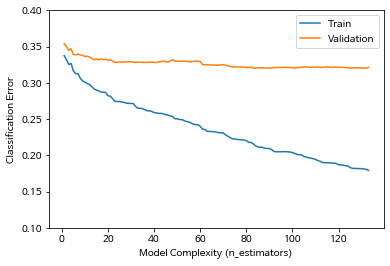

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.1, 0.4)) 
plt.legend();

In [ ]:
print(classification_report(y_val, model.predict(X_val_encoded)))

검증 정확도 0.68
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      7217
           1       0.38      0.59      0.46      2158

    accuracy                           0.68      9375
   macro avg       0.61      0.65      0.62      9375
weighted avg       0.74      0.68      0.70      9375



In [ ]:
train_ratio_vc = y_train_ratio.value_counts().tolist()

weight = float(train_ratio_vc[0] / train_ratio_vc[1])
weight

1.6872557859933874

#**model6 - XGBoost, 훈련데이터 비율조정O, 타겟 분류 비중 파라미터 추가 O**

**검증 데이터 f1-score: 0.59**

In [ ]:
encoder = OrdinalEncoder()
X_train_ratio_encoded = encoder.fit_transform(X_train_ratio) # 학습데이터
X_val_ratio_encoded = encoder.transform(X_val_ratio) # 검증데이터

model_ratio = XGBClassifier(
    n_estimators=2000,  
    min_child_weight=1,
    random_state=2,
    n_jobs=-1,
    max_depth=8,        
    learning_rate=0.2,
    scale_pos_weight=weight, # imbalance 데이터이기 때문에 적용
)

eval_ratio_set = [(X_train_ratio_encoded, y_train_ratio), 
            (X_val_ratio_encoded, y_val_ratio)]

model_ratio.fit(X_train_ratio_encoded, y_train_ratio, 
          eval_set=eval_ratio_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) 




[0]	validation_0-error:0.328561	validation_1-error:0.355645
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.312007	validation_1-error:0.343399
[2]	validation_0-error:0.311839	validation_1-error:0.348096
[3]	validation_0-error:0.308372	validation_1-error:0.350277
[4]	validation_0-error:0.303059	validation_1-error:0.348096
[5]	validation_0-error:0.301046	validation_1-error:0.351116
[6]	validation_0-error:0.293999	validation_1-error:0.348935
[7]	validation_0-error:0.291986	validation_1-error:0.347089
[8]	validation_0-error:0.289078	validation_1-error:0.343063
[9]	validation_0-error:0.286841	validation_1-error:0.347089
[10]	validation_0-error:0.282031	validation_1-error:0.351116
[11]	validation_0-error:0.278116	validation_1-error:0.347593
[12]	validation_0-error:0.274929	validation_1-error:0.346922
[13]	validation_0-error:0.27258	validation_1-error:0.345

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.6872557859933874,
              seed=None, silent=None, subsample=1, verbosity=1)

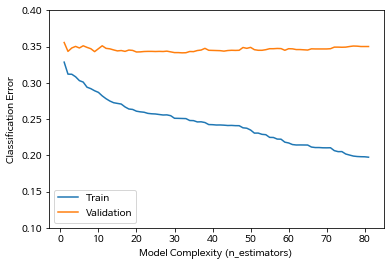

In [ ]:
results = model_ratio.evals_result()
train_ratio_error = results['validation_0']['error']
val_ratio_error = results['validation_1']['error']

epoch = range(1, len(train_ratio_error)+1)
plt.plot(epoch, train_ratio_error, label='Train')
plt.plot(epoch, val_ratio_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.10, 0.4)) # Zoom in
plt.legend();

In [ ]:
print('검증 정확도', model_ratio.score(X_val_ratio_encoded, y_val_ratio))

print(classification_report(y_val_ratio, model_ratio.predict(X_val_ratio_encoded)))

검증 정확도 0.6586143264552927
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      3731
           1       0.54      0.65      0.59      2230

    accuracy                           0.66      5961
   macro avg       0.65      0.66      0.65      5961
weighted avg       0.68      0.66      0.66      5961



#**model7 - 가장 성능이 높게 나온 model6에 Random CV를 이용해 최적의 파라미터를 구하고, 그 것을 적용**

**검증 데이터 f1-score: 0.59**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier()

# 하이퍼 파라미터
dist = {'subsample': np.linspace(0.5, 1, 7),
        'n_estimators': [50,100,500,900,1000,2000],
        'min_child_weight': [1,3,5],
        'random_state': [2],
        'max_depth': list(range(5, 8)),
        'learning_rate': [0.1, 0.2, 0.3],
        'scale_pos_weight': [weight],
       }

# Create a random search object
xgb_random = RandomizedSearchCV(estimator = xgb_clf,
                                param_distributions = dist,
                                n_iter = 10,
                                scoring='precision', 
                                n_jobs=-1, 
                                cv = 3, 
                                refit=True, 
                                return_train_score = True)

# Fit to the training data
xgb_random.fit(X_train_ratio_encoded, y_train_ratio)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [5, 6, 7],
                                       

In [ ]:
print('최적 하이퍼파라미터: ', xgb_random.best_params_)

최적 하이퍼파라미터:  {'subsample': 0.75, 'scale_pos_weight': 1.6872557859933874, 'random_state': 2, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1}
auc:  0.52171058482306


In [ ]:
model_best = xgb_random.best_estimator_
print('최적 파라미터 모델 f1_score: ',f1_score(y_val_ratio, model_best.predict(X_val_ratio_encoded)))
print('최적 파라미터 모델 : ',classification_report(y_val_ratio, model_best.predict(X_val_ratio_encoded)))

최적 파라미터 모델 f1_score:  0.5939320876029737
최적 파라미터 모델 :                precision    recall  f1-score   support

           0       0.77      0.66      0.71      3731
           1       0.54      0.66      0.59      2230

    accuracy                           0.66      5961
   macro avg       0.65      0.66      0.65      5961
weighted avg       0.68      0.66      0.67      5961

0.5869697584737164
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      3731
           1       0.54      0.65      0.59      2230

    accuracy                           0.66      5961
   macro avg       0.65      0.66      0.65      5961
weighted avg       0.68      0.66      0.66      5961

0.48823836905384216
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      3731
           1       0.59      0.42      0.49      2230

    accuracy                           0.67      5961
   macro avg       0.64      0.62 

#**최종 모델 test**

**f1-score: 0.60**

In [ ]:
classification_report(y_test_ratio, model_best.predict(X_test_ratio)))

#**머신 러닝 모델 해석**

#**범주형 변수 - '성별 코드'**

**여성이 남성에 비해 '간 기능에 문제가 없다'로 분류되는데, 영향을 준다.**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


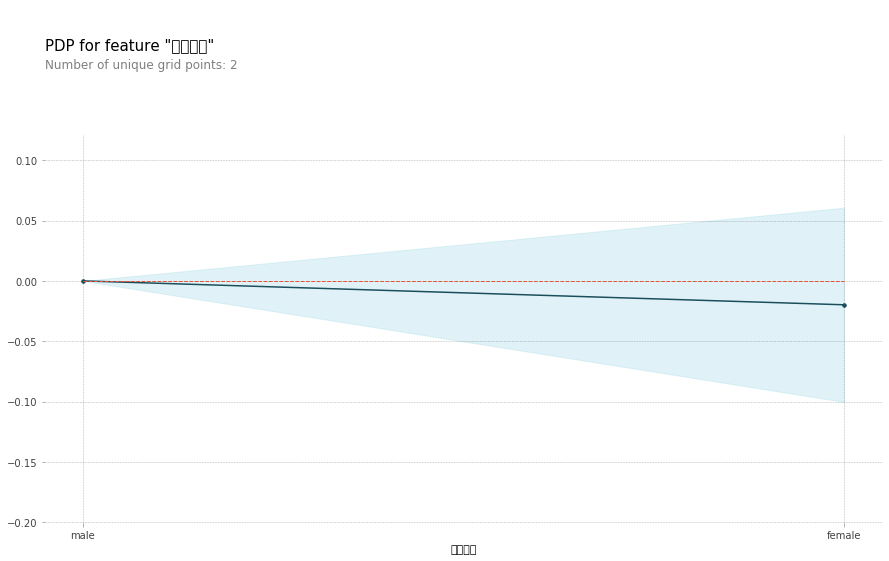

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = '성별코드'

isolated = pdp_isolate(
    model=model_best, 
    dataset=X_test_ratio, 
    model_features=X_val_ratio.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);
plt.xticks([1, 2], ['male', 'female',]);

#**범주형 변수 - '흡연 상태'**

**흡연을 하는 경우가 안하는 경우보다 '간 기능에 문제가 있다'에 분류되는 데 더 큰 영향을 끼친다**

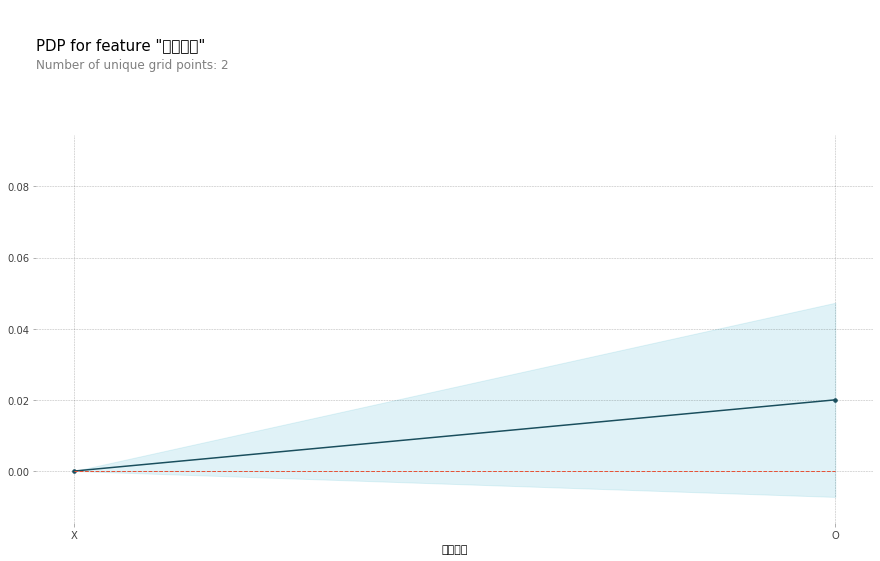

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = '흡연상태'

isolated = pdp_isolate(
    model=model_best, 
    dataset=X_test_ratio, 
    model_features=X_val_ratio.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);
plt.xticks([0, 1], ['X', 'O',]);

#**범주형 변수 - '음주 여부'**

**음부 여부가 '간 기능에 문제가 있다'와 음의 상관관계를 가졌다는 분석이 나왔다.**

**상식과는 조금 다른 결과가 나와 모델의 점검이 필요하다 생각된다.**

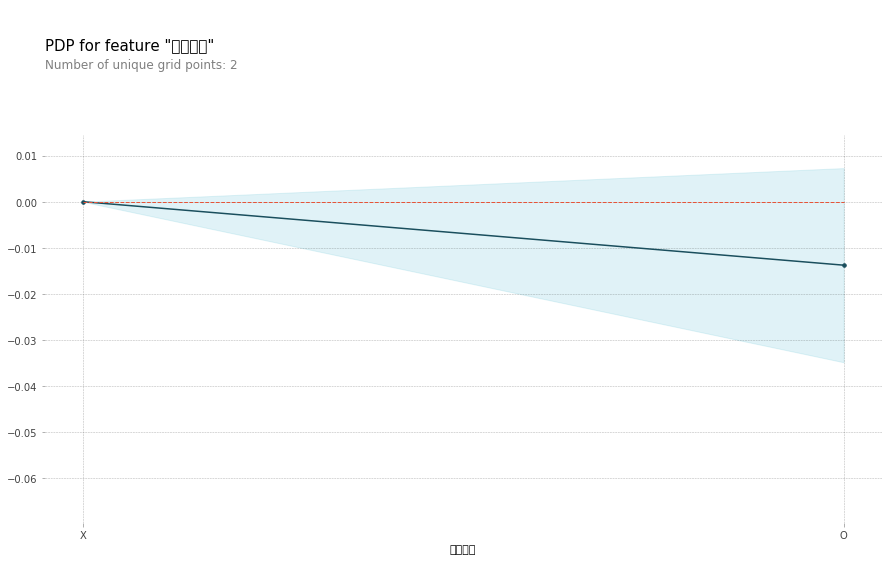

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = '음주여부'

isolated = pdp_isolate(
    model=model_best, 
    dataset=X_test_ratio, 
    model_features=X_val_ratio.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);
plt.xticks([0, 1], ['X', 'O',]);

#**연속형 변수 - '허리둘레/신장',  '체중/신장',  '연령대',  '혈압'**

**신장대비 허리둘레 특성은 전반적으로, 높을수록 '간 건강에 문제가 있다'와 양의 상관관계에 있고, 낮을수록 '간 건강에 문제가 있다'와 음의 상관관계에 있다.**

**신장대비 체중 특성도 비슷한 모습이다.**

**수축기 혈압과, 이완기 혈압 특성의 경우 고혈압의 기준이되는 각각 약 130, 90 수치를 넘어설 때 '간 건강에 문제가 있다'와 양의 상관관계를 갖는 것을 확인할 수 있다.** 

In [ ]:
import shap
explainer = shap.TreeExplainer(model_best)

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test_ratio.iloc[:500])
shap.force_plot(explainer.expected_value, shap_values, X_test_ratio.iloc[:500])

#**결론**

**최종모델의 테스트 점수가 기존 모델을 크게 상회 하였기 때문에 귀무가설인 '모델을 이용해 간 건강에 문제가 있는 사람들을 분류할 수 있다'는 유지 되겠지만, 음주 여부 특성에 대한 분석에서 기존의 상식과 다른 결과가 나와 모델의 재점검이 필요할 것이라 판단되고, 또 이런 특징을 볼 때 큰 데이터 셋을 이용해 예측할 때는 전체적인 예측력은 좋을 수 있을 것이다. 하지만 과연 데이터 하나하나의 예측을 수행할 때도 높은 성능을 보일 수 있을까 라는 생각이 들었다.**